In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from IPython.display import display

# Dataset: [Iris](https://archive.ics.uci.edu/dataset/53/iris)

This dataset consists of 3 different types of irises' petal and sepal length and its labels.

* $y\in\{0,1,2\}$; 3-class classification problem (0: setosa, 1: versicolor, 2: virginica)
* $N=150$ observations (50 for each class)
* $p=4$ features (sepal length, sepal width, petal length, petal width)

<figure>
<center>
<img src='https://editor.analyticsvidhya.com/uploads/51518iris%20img1.png' />
<figcaption>Three different types of iris flowers.</figcaption>
</center>
</figure>

In [ ]:
# Load data
iris = datasets.load_iris(as_frame=True)
df = iris['frame']

In [ ]:
# Show data
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Exploratory Data Analysis

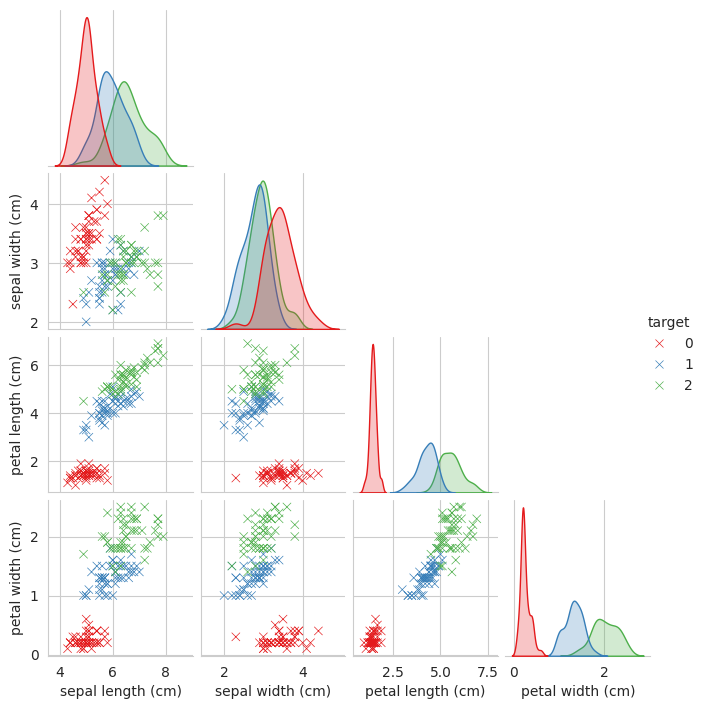

In [ ]:
# Pairwise scatter plots
# Documentation: https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.set_style('whitegrid')             # background color (optional)
plt.rcParams.update({'font.size': 10}) # update font size (optional)
g = sns.pairplot(
    data=df,
    vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
    hue='target',
    palette='Set1',
    kind='scatter',
    diag_kind='kde',
    markers='x',
    corner=True,
)

g.fig.set_size_inches(7, 7)  # configure plot size
plt.show()                   # show plot

# Data Preprocessing

In [ ]:
# Separate X & y
X = df.drop('target', axis=1)  # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
y = df['target']               # The `target' column contains the class labels.

assert isinstance(X, pd.DataFrame)
assert isinstance(y, pd.Series)

In [ ]:
indices = np.arange(len(df))   # np.array([0,1,...,149])
np.random.seed(42)             # set random seed for reproducibility
np.random.shuffle(indices)     # shuffle the indices

In [ ]:
print(indices)  # integers from 0 to 149 in random order

[ 73  18 118  78  76  31  64 141  68  82 110  12  36   9  19  56 104  69
  55 132  29 127  26 128 131 145 108 143  45  30  22  15  65  11  42 146
  51  27   4  32 142  85  86  16  10  81 133 137  75 109  96 105  66   0
 122  67  28  40  44  60 123  24  25  23  94  39  95 117  47  97 113  33
 138 101  62  84 148  53   5  93 111  49  35  80  77  34 114   7  43  70
  98 120  83 134 135  89   8  13 119 125   3  17  38  72 136   6 112 100
   2  63  54 126  50 115  46 139  61 147  79  59  91  41  58  90  48  88
 107 124  21  57 144 129  37 140   1  52 130 103  99 116  87  74 121 149
  20  71 106  14  92 102]


In [ ]:
train_indices = indices[:90]   # indexes for training data (60%)
val_indices = indices[90:120]  # indexes for validation data (20%)
test_indices = indices[120:]   # indexes for testing data (20%)

In [ ]:
# Use the indexes to split the data into train, validation, and test sets.
# Since `X` is a pandas.Dataframe, we need to use the `.iloc` method
# to select the rows using indexes.
X_train, y_train = X.iloc[train_indices], y[train_indices]
X_val, y_val = X.iloc[val_indices], y[val_indices]
X_test, y_test = X.iloc[test_indices], y[test_indices]

# Model Training Demo

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # we actually imported this already at the very top.

In [ ]:
k = 1                                              # specify number of nearest neighbors
knn = KNeighborsClassifier(k, metric='euclidean')  # create model instance
knn.fit(X_train, y_train);                         # train model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_train_pred = knn.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print(f"(k={k}) Training accuracy = {train_acc:.4f}")

(k=1) Training accuracy = 1.0000


In [ ]:
y_val_pred = knn.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)
print(f"(k={k}) Validation accuracy = {val_acc:.4f}")

(k=1) Validation accuracy = 0.9000


In [ ]:
y_test_pred = knn.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"(k={k}) Test accuracy = {test_acc:.4f}")

(k=1) Test accuracy = 0.9667


# Choosing the Best $k$

In [ ]:
ks = list(range(1, 15))  # [1,2,...,14]
train_acc_list = []
val_acc_list = []

for k in ks:

    # Model training
    knn = KNeighborsClassifier(k, metric='euclidean')
    knn.fit(X_train, y_train)

    # Model evaluation on training data
    y_train_pred = knn.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    train_acc_list.append(train_acc)


    # Model evaluation on validation data
    y_val_pred = knn.predict(X_val)
    val_acc = accuracy_score(y_val, y_val_pred)
    val_acc_list.append(val_acc)

In [ ]:
plt.rcParams.update({'font.size': 18})         # update font size (optional)

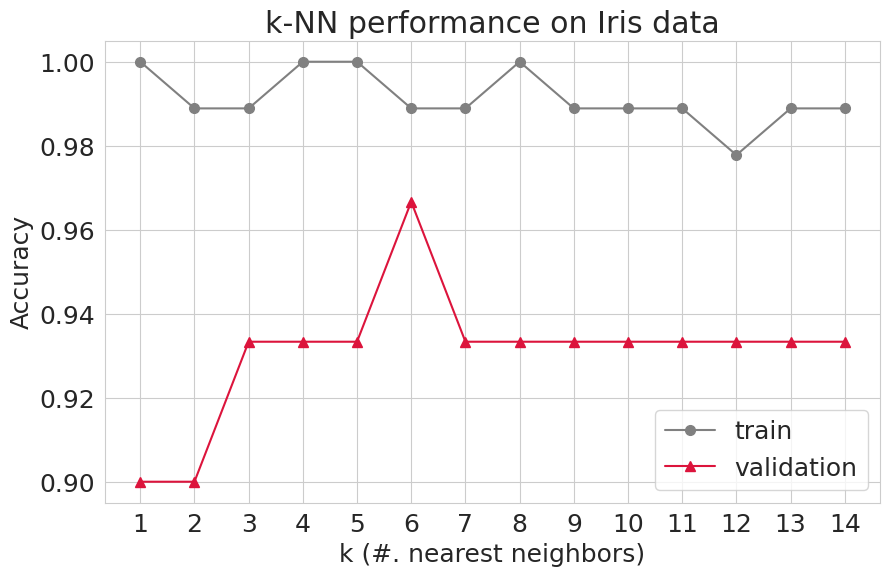

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))  # create figure with one subplot; ax
ax.plot(ks, train_acc_list, marker='o', markersize=7, c='gray', label='train')        # line plot of training accuracies
ax.plot(ks, val_acc_list, marker='^', markersize=7, c='crimson', label='validation')  # line plot of validation accuracies
ax.xaxis.set_ticks(ks)                         # set x-axis ticks (optional)
ax.set_xlabel('k (#. nearest neighbors)')      # set label of x-axis (optional)
ax.set_ylabel('Accuracy')                      # set label of y-axis (optional)
ax.set_title('k-NN performance on Iris data')  # set title of plot (optional)
ax.legend(loc='lower right')                   # add legend (optional)
plt.show(fig)                                  # show figure

In [ ]:
# find index of highest validation accuracy -> locate `k`
best_k = ks[np.argmax(val_acc_list)]

# Re-train model with best k (showing highest validation accuracy)
knn_final = KNeighborsClassifier(best_k, metric='euclidean')
knn_final.fit(X_train, y_train)

# Measure performance on test data
y_test_pred = knn_final.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy (k={best_k}): {test_acc:.3f}")

Test accuracy (k=6): 0.967
